# Logistic Regression for Titanic Survival Prediction

## 📚 Learning Objectives

By the end of this notebook, you will understand:
- How logistic regression works mathematically
- The difference between linear and logistic regression
- How to interpret logistic regression coefficients
- When to use logistic regression vs other algorithms
- How to evaluate classification models

## [TARGET] What is Logistic Regression?

**Logistic Regression** is a statistical method used for **classification** problems. Despite the name "regression", it's actually a classification algorithm!

### Key Differences from Linear Regression:
- **Linear Regression**: Predicts continuous values (prices, temperatures)
- **Logistic Regression**: Predicts probabilities and categories (survive/die, spam/not spam)

### The Magic: Sigmoid Function 🪄

The **sigmoid function** transforms any real number into a value between 0 and 1:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

Where $z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n$

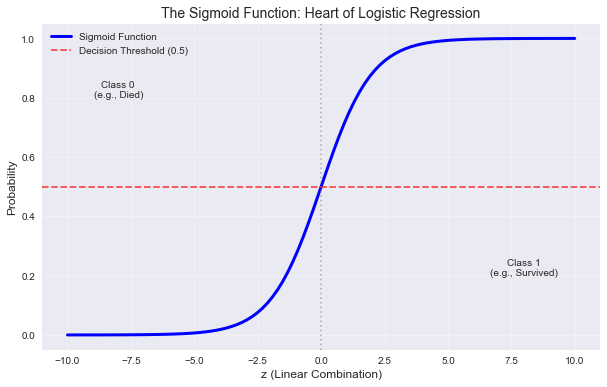

[SEARCH] Key Insights:
• When z = 0, probability = 0.5 (decision boundary)
• When z > 0, probability > 0.5 (predict class 1)
• When z < 0, probability < 0.5 (predict class 0)
• The curve is smooth, not a sharp cutoff


In [1]:
# Let's visualize the sigmoid function!
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10, 6))

# Generate z values
z = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-z))

plt.plot(z, sigmoid, 'b-', linewidth=3, label='Sigmoid Function')
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.7, label='Decision Threshold (0.5)')
plt.axvline(x=0, color='gray', linestyle=':', alpha=0.5)
plt.xlabel('z (Linear Combination)', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title('The Sigmoid Function: Heart of Logistic Regression', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.text(-8, 0.8, 'Class 0\n(e.g., Died)', fontsize=10, ha='center')
plt.text(8, 0.2, 'Class 1\n(e.g., Survived)', fontsize=10, ha='center')
plt.show()

print("[SEARCH] Key Insights:")
print("• When z = 0, probability = 0.5 (decision boundary)")
print("• When z > 0, probability > 0.5 (predict class 1)")
print("• When z < 0, probability < 0.5 (predict class 0)")
print("• The curve is smooth, not a sharp cutoff")

## 🚢 Our Dataset: Titanic Survival

We'll predict whether passengers survived the Titanic disaster based on features like:
- **Passenger Class** (1st, 2nd, 3rd)
- **Gender** 
- **Age**
- **Ticket Fare**
- **Family Size**
- And more...

Let's load and explore the data:

Using device: cuda
Titanic dataset downloaded!
[CHART] Dataset Overview:
   Training samples: 712
   Test samples: 179
   Features: 8
   Feature names: ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'Title']


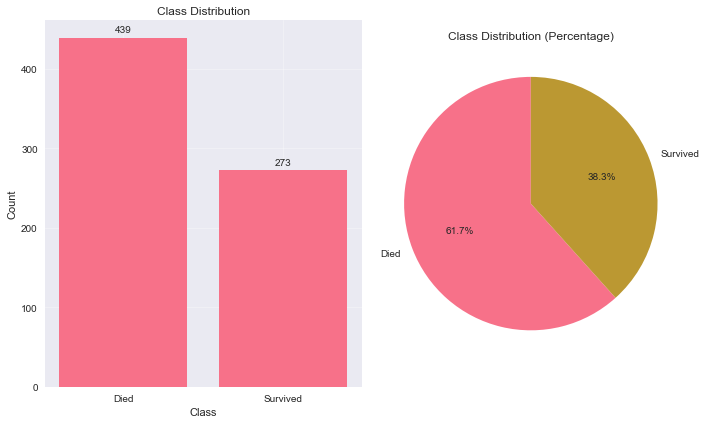


⚰️ Overall survival rate: 38.3%
   This means 38.3% of passengers survived
   A model predicting 'everyone dies' would be 61.7% accurate


In [2]:
import sys
import os
sys.path.append('..')

from utils.data_utils import load_titanic_data
from utils.visualization import plot_data_distribution, plot_class_distribution
import pandas as pd

# Load the preprocessed Titanic data
X_train, X_test, y_train, y_test, feature_names = load_titanic_data()

print(f"[CHART] Dataset Overview:")
print(f"   Training samples: {X_train.shape[0]}")
print(f"   Test samples: {X_test.shape[0]}")
print(f"   Features: {X_train.shape[1]}")
print(f"   Feature names: {feature_names}")

# Show class distribution
fig = plot_class_distribution(y_train, class_names=['Died', 'Survived'])
plt.show()

# Calculate survival rate
survival_rate = np.mean(y_train)
print(f"\n⚰️ Overall survival rate: {survival_rate:.1%}")
print(f"   This means {survival_rate:.1%} of passengers survived")
print(f"   A model predicting 'everyone dies' would be {1-survival_rate:.1%} accurate")

## [TRAIN] Training Our First Logistic Regression Model

Let's train a basic logistic regression model and see how it performs:

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import time

# Create and train the model
print("[START] Training Logistic Regression model...")
start_time = time.time()

model = LogisticRegression(
    random_state=42,      # For reproducible results
    max_iter=1000        # Maximum iterations
)

model.fit(X_train, y_train)
training_time = time.time() - start_time

print(f"[OK] Training completed in {training_time:.3f} seconds")

# Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n[TARGET] Model Accuracy: {accuracy:.1%}")

# Show detailed classification report
print("\n[LIST] Detailed Performance Report:")
print(classification_report(y_test, y_pred, target_names=['Died', 'Survived']))

[START] Training Logistic Regression model...
[OK] Training completed in 0.017 seconds

[TARGET] Model Accuracy: 79.3%

[LIST] Detailed Performance Report:
              precision    recall  f1-score   support

        Died       0.81      0.86      0.84       110
    Survived       0.76      0.68      0.72        69

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



## [LEARN] Understanding the Model: Feature Importance

One of the biggest advantages of logistic regression is **interpretability**. The coefficients tell us how each feature affects survival probability:

[MATH] Model Equation (simplified):
   log(odds) = -0.650
              -0.857 × Pclass
              -1.260 × Sex
              -0.399 × Age
              +0.077 × Fare
              -0.162 × Embarked
              -0.503 × FamilySize
              -0.302 × IsAlone
              -0.129 × Title

[TARGET] Coefficient Interpretation:
   Feature  Coefficient Effect_on_Survival  Magnitude
       Sex    -1.259845          Decreases   1.259845
    Pclass    -0.857319          Decreases   0.857319
FamilySize    -0.502953          Decreases   0.502953
       Age    -0.398901          Decreases   0.398901
   IsAlone    -0.302364          Decreases   0.302364
  Embarked    -0.161561          Decreases   0.161561
     Title    -0.129268          Decreases   0.129268
      Fare     0.076719          Increases   0.076719


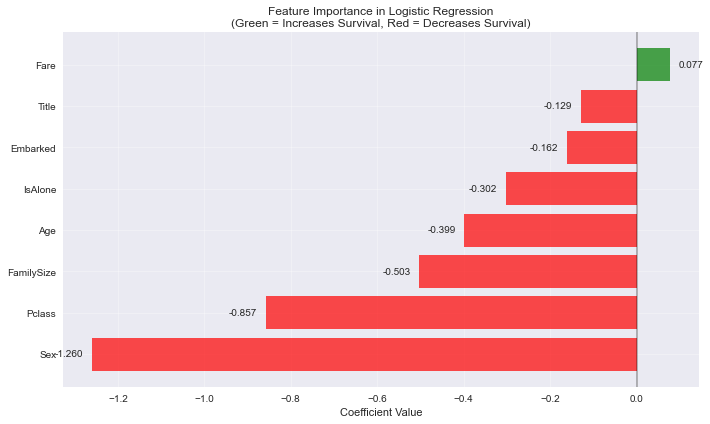

In [4]:
# Get model coefficients
coefficients = model.coef_[0]
intercept = model.intercept_[0]

print(f"[MATH] Model Equation (simplified):")
print(f"   log(odds) = {intercept:.3f}")
for name, coef in zip(feature_names, coefficients):
    print(f"              {coef:+.3f} × {name}")

print(f"\n[TARGET] Coefficient Interpretation:")
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Effect_on_Survival': ['Increases' if c > 0 else 'Decreases' for c in coefficients],
    'Magnitude': np.abs(coefficients)
})

# Sort by magnitude
coef_df = coef_df.sort_values('Magnitude', ascending=False)
print(coef_df.to_string(index=False))

# Visualize feature importance
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in coef_df['Coefficient']]
bars = plt.barh(coef_df['Feature'], coef_df['Coefficient'], color=colors, alpha=0.7)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression\n(Green = Increases Survival, Red = Decreases Survival)')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)

# Add value labels
for bar, value in zip(bars, coef_df['Coefficient']):
    plt.text(value + 0.02 if value > 0 else value - 0.02, bar.get_y() + bar.get_height()/2, 
             f'{value:.3f}', va='center', ha='left' if value > 0 else 'right')

plt.tight_layout()
plt.show()

## [SEARCH] Real Examples: How the Model Makes Decisions

Let's see how our model makes predictions for real passengers:

In [5]:
# Let's examine some specific predictions
sample_indices = [0, 5, 10, 15, 20]

print("[SEARCH] Detailed Prediction Analysis:")
print("=" * 60)

for i, idx in enumerate(sample_indices):
    # Get sample data
    sample_features = X_test[idx]
    true_label = y_test[idx]
    predicted_label = y_pred[idx]
    probabilities = y_proba[idx]
    
    # Calculate the linear combination (z)
    z = intercept + np.dot(coefficients, sample_features)
    prob_survived = 1 / (1 + np.exp(-z))  # Sigmoid function
    
    print(f"\n[SEARCH] Passenger {idx + 1}:")
    print(f"   Features: {[f'{name}={val:.2f}' for name, val in zip(feature_names, sample_features)][:4]}")
    print(f"   Linear combination (z): {z:.3f}")
    print(f"   Sigmoid(z): {prob_survived:.3f}")
    print(f"   Predicted: {'Survived' if predicted_label == 1 else 'Died'} (confidence: {max(probabilities):.1%})")
    print(f"   Actual: {'Survived' if true_label == 1 else 'Died'}")
    print(f"   Correct: {'[OK] Yes' if predicted_label == true_label else '[ERROR] No'}")
    
    # Show top contributing features
    contributions = coefficients * sample_features
    top_contrib_idx = np.argsort(np.abs(contributions))[-3:][::-1]
    
    print(f"   Top 3 contributing features:")
    for feat_idx in top_contrib_idx:
        contrib = contributions[feat_idx]
        direction = "survival" if contrib > 0 else "death"
        print(f"     • {feature_names[feat_idx]}: {contrib:+.3f} (pushes toward {direction})")

[SEARCH] Detailed Prediction Analysis:

[SEARCH] Passenger 1:
   Features: ['Pclass=0.83', 'Sex=0.74', 'Age=-0.42', 'Fare=-0.16']
   Linear combination (z): -2.227
   Sigmoid(z): 0.097
   Predicted: Died (confidence: 90.3%)
   Actual: Died
   Correct: [OK] Yes
   Top 3 contributing features:
     • Sex: -0.935 (pushes toward death)
     • Pclass: -0.711 (pushes toward death)
     • IsAlone: +0.378 (pushes toward survival)

[SEARCH] Passenger 6:
   Features: ['Pclass=0.83', 'Sex=-1.35', 'Age=0.50', 'Fare=-0.30']
   Linear combination (z): 0.180
   Sigmoid(z): 0.545
   Predicted: Survived (confidence: 54.5%)
   Actual: Survived
   Correct: [OK] Yes
   Top 3 contributing features:
     • Sex: +1.697 (pushes toward survival)
     • Pclass: -0.711 (pushes toward death)
     • IsAlone: +0.378 (pushes toward survival)

[SEARCH] Passenger 11:
   Features: ['Pclass=0.83', 'Sex=0.74', 'Age=-0.11', 'Fare=-0.50']
   Linear combination (z): -2.160
   Sigmoid(z): 0.103
   Predicted: Died (confidence

## [CHART] Model Performance Visualization

Let's create some visualizations to better understand our model's performance:

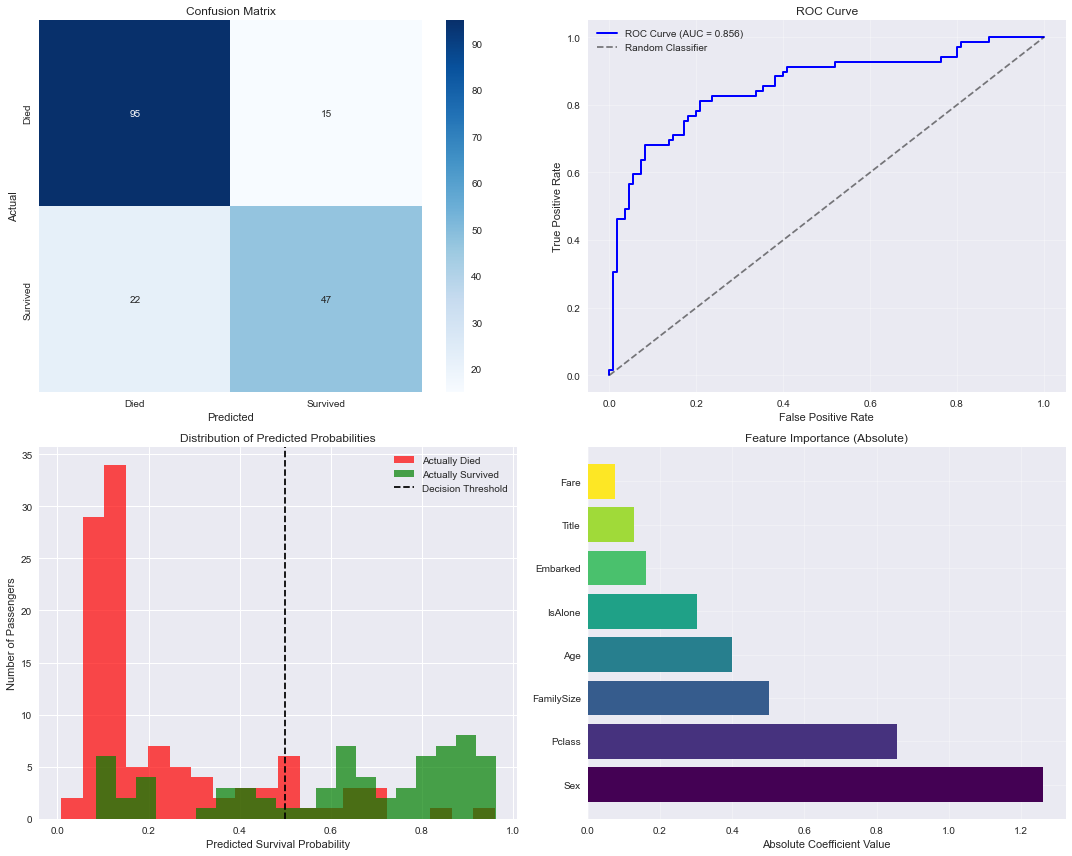

[CHART] Performance Insights:
• AUC Score: 0.856 (0.5 = random, 1.0 = perfect)
• The model correctly identifies 47 out of 69 survivors
• The model correctly identifies 95 out of 110 deaths
• False positives (predicted survival but died): 15
• False negatives (predicted death but survived): 22


In [6]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Died', 'Survived'], 
            yticklabels=['Died', 'Survived'], 
            ax=axes[0,0])
axes[0,0].set_title('Confusion Matrix')
axes[0,0].set_xlabel('Predicted')
axes[0,0].set_ylabel('Actual')

# 2. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
auc_score = roc_auc_score(y_test, y_proba[:, 1])

axes[0,1].plot(fpr, tpr, 'b-', linewidth=2, label=f'ROC Curve (AUC = {auc_score:.3f})')
axes[0,1].plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random Classifier')
axes[0,1].set_xlabel('False Positive Rate')
axes[0,1].set_ylabel('True Positive Rate')
axes[0,1].set_title('ROC Curve')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Probability Distribution
died_probs = y_proba[y_test == 0, 1]  # Survival probabilities for people who died
survived_probs = y_proba[y_test == 1, 1]  # Survival probabilities for people who survived

axes[1,0].hist(died_probs, bins=20, alpha=0.7, label='Actually Died', color='red')
axes[1,0].hist(survived_probs, bins=20, alpha=0.7, label='Actually Survived', color='green')
axes[1,0].axvline(x=0.5, color='black', linestyle='--', label='Decision Threshold')
axes[1,0].set_xlabel('Predicted Survival Probability')
axes[1,0].set_ylabel('Number of Passengers')
axes[1,0].set_title('Distribution of Predicted Probabilities')
axes[1,0].legend()

# 4. Feature Importance (Absolute Values)
feature_importance = np.abs(coefficients)
sorted_idx = np.argsort(feature_importance)[::-1]

axes[1,1].barh(range(len(feature_names)), 
               feature_importance[sorted_idx], 
               color=plt.cm.viridis(np.linspace(0, 1, len(feature_names))))
axes[1,1].set_yticks(range(len(feature_names)))
axes[1,1].set_yticklabels([feature_names[i] for i in sorted_idx])
axes[1,1].set_xlabel('Absolute Coefficient Value')
axes[1,1].set_title('Feature Importance (Absolute)')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print interpretation
print("[CHART] Performance Insights:")
print(f"• AUC Score: {auc_score:.3f} (0.5 = random, 1.0 = perfect)")
print(f"• The model correctly identifies {cm[1,1]} out of {cm[1,0] + cm[1,1]} survivors")
print(f"• The model correctly identifies {cm[0,0]} out of {cm[0,0] + cm[0,1]} deaths")
print(f"• False positives (predicted survival but died): {cm[0,1]}")
print(f"• False negatives (predicted death but survived): {cm[1,0]}")

## [PARAM] Hyperparameter Tuning

Logistic regression has several hyperparameters we can tune to improve performance. Let's explore the most important ones:

In [7]:
from sklearn.model_selection import GridSearchCV, cross_val_score

print("[PARAM] Hyperparameter Tuning with Grid Search")
print("=" * 50)

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0, 100.0],  # Regularization strength
    'penalty': ['l1', 'l2'],              # Regularization type
    'solver': ['liblinear', 'saga']       # Optimization algorithm
}

print(f"[LIST] Testing {len(param_grid['C']) * len(param_grid['penalty']) * len(param_grid['solver'])} combinations...")

# Perform grid search
grid_search = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),
    param_grid,
    cv=5,                    # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,              # Use all available cores
    verbose=0
)

grid_search.fit(X_train, y_train)

print(f"\n[BEST] Best Parameters: {grid_search.best_params_}")
print(f"[TARGET] Best Cross-Validation Score: {grid_search.best_score_:.4f}")

# Test the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)

print(f"\n[CHART] Performance Comparison:")
print(f"   Basic Model:     {accuracy:.4f}")
print(f"   Optimized Model: {best_accuracy:.4f}")
print(f"   Improvement:     {best_accuracy - accuracy:+.4f}")

# Show parameter importance
results_df = pd.DataFrame(grid_search.cv_results_)
print(f"\n[SEARCH] Parameter Analysis:")
print(f"   C (Regularization): Lower C = more regularization, higher C = less regularization")
print(f"   Penalty: L1 creates sparse models, L2 shrinks coefficients")
print(f"   Solver: Different optimization algorithms")

[PARAM] Hyperparameter Tuning with Grid Search
[LIST] Testing 20 combinations...

[BEST] Best Parameters: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
[TARGET] Best Cross-Validation Score: 0.8006

[CHART] Performance Comparison:
   Basic Model:     0.7933
   Optimized Model: 0.7933
   Improvement:     +0.0000

[SEARCH] Parameter Analysis:
   C (Regularization): Lower C = more regularization, higher C = less regularization
   Penalty: L1 creates sparse models, L2 shrinks coefficients
   Solver: Different optimization algorithms


## 🤔 When Should You Use Logistic Regression?

### [OK] Use Logistic Regression When:
- You need **interpretable results** (understand WHY a prediction was made)
- You have **linear relationships** between features and log-odds
- You want a **fast, simple baseline** model
- Your dataset is **relatively small to medium-sized**
- You need **probability estimates**, not just classifications

### [ERROR] Don't Use Logistic Regression When:
- You have **complex non-linear relationships**
- Features have **strong interactions** that need to be captured
- You're working with **raw images, audio, or unstructured text**
- You have **many irrelevant features** without regularization
- The classes are **perfectly separable** (model may not converge)

### [BEST] Advantages:
1. **Highly Interpretable**: Each coefficient has a clear meaning
2. **Fast Training**: Very quick to train and predict
3. **Probabilistic Output**: Gives you confidence in predictions
4. **No Assumptions**: Doesn't assume feature distributions
5. **Regularization**: Built-in options to prevent overfitting

### [WARNING] Limitations:
1. **Linear Decision Boundary**: Can't capture complex patterns
2. **Feature Scaling**: Sensitive to different feature scales
3. **Outliers**: Can be influenced by extreme values
4. **Independence Assumption**: Assumes features are independent

## [TARGET] Key Takeaways

From this Titanic analysis, we learned:

1. **Gender was the strongest predictor** - women were much more likely to survive
2. **Passenger class mattered** - first-class passengers had better survival rates
3. **Age had a slight negative effect** - younger passengers slightly more likely to survive
4. **Family relationships mattered** - being alone vs. with family affected survival

### [MATH] Mathematical Intuition:
- The model learns **weights (coefficients)** for each feature
- It combines features linearly, then applies sigmoid to get probabilities
- **Positive coefficients** increase survival probability
- **Negative coefficients** decrease survival probability

### [START] Next Steps:
1. Try **feature engineering** (create new features from existing ones)
2. Handle **class imbalance** if present
3. Compare with **other algorithms** (Decision Trees, Random Forest, etc.)
4. Use **ensemble methods** to combine multiple models

Logistic Regression is an excellent starting point for any classification problem - it's simple, fast, and gives you great insights into your data!

In [8]:
# Final summary
print("[TARGET] FINAL SUMMARY")
print("=" * 50)
print(f"Dataset: Titanic Survival Prediction")
print(f"Algorithm: Logistic Regression")
print(f"Final Accuracy: {best_accuracy:.1%}")
print(f"Training Time: {training_time:.3f} seconds")
print(f"Most Important Feature: {feature_names[np.argmax(np.abs(coefficients))]}")
print(f"")
print(f"[OK] Pros: Fast, interpretable, probabilistic")
print(f"[WARNING]  Cons: Linear decision boundary only")
print(f"")
print(f"[START] Ready to explore more complex algorithms!")

[TARGET] FINAL SUMMARY
Dataset: Titanic Survival Prediction
Algorithm: Logistic Regression
Final Accuracy: 79.3%
Training Time: 0.017 seconds
Most Important Feature: Sex

[OK] Pros: Fast, interpretable, probabilistic
[WARNING]  Cons: Linear decision boundary only

[START] Ready to explore more complex algorithms!
